# ScikitLearnFingerCounter

In [185]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.style.use('ggplot')

In [186]:
path = r'C:\Users\leoko\Desktop\Studium\fingerfun\DatasetForFingerCounter'
training_path = path + r'\Training_landmarks.csv'
test_path = path + r'\Test_landmarks.csv'
validation_path = path + r'\Validation_landmarks.csv'

In [187]:
#Load the dataset
df_train = pd.read_csv(training_path)
df_test = pd.read_csv(test_path)
df_validation = pd.read_csv(validation_path)
#Print the first 5 rows of the dataframe.
df_train.head()
df_test.head()
df_validation.head()

,filename,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,Alex_image_five_44.jpg,0.424938,0.747210,3.969675e-07,0.408833,0.693837,0.004544,0.401896,0.644301,-0.001519,...,-0.056885,0.568545,0.670895,-0.074861,0.601265,0.669721,-0.084871,0.626967,0.665460,-0.090870
1,Alex_image_five_53.jpg,0.436098,0.649468,5.775907e-07,0.421060,0.667005,-0.053530,0.408444,0.685788,-0.097750,...,-0.085932,0.533842,0.590023,-0.111396,0.568258,0.600478,-0.121012,0.602388,0.611392,-0.126920
2,Alex_image_five_6.jpg,0.452503,0.694372,9.970689e-07,0.513345,0.746059,-0.049644,0.579844,0.787838,-0.082954,...,-0.064897,0.537820,0.412581,-0.089943,0.549476,0.363218,-0.103511,0.568484,0.318638,-0.112079
3,Alex_image_five_60.jpg,0.482730,0.634917,1.911106e-07,0.529030,0.596542,-0.022270,0.561631,0.544044,-0.034478,...,-0.043403,0.376302,0.516904,-0.061943,0.346921,0.508284,-0.074183,0.322458,0.498112,-0.082960
4,Alex_image_five_63.jpg,0.468378,0.673269,4.351499e-07,0.515781,0.653745,-0.026275,0.565885,0.626550,-0.046800,...,-0.026776,0.404313,0.488467,-0.036692,0.382986,0.466024,-0.037964,0.368307,0.442225,-0.035899


In [188]:
#Train
X_train = df_train[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_train = df_train['filename']
y_train = y_train.map(lambda image: image.split('_')[2])
X_train.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.475704,0.618786,9.811158e-07,0.479171,0.676307,-0.068816,0.486418,0.723549,-0.113471,0.484434,...,-0.050218,0.619755,0.521506,-0.067545,0.647437,0.503105,-0.080805,0.673448,0.490987,-0.091382
1,0.537752,0.787452,6.181712e-07,0.541429,0.714240,0.010108,0.535743,0.657173,0.008893,0.528629,...,-0.029821,0.351435,0.829174,-0.049971,0.317871,0.852092,-0.063870,0.287592,0.865897,-0.070944
2,0.527185,0.675401,1.024003e-06,0.517319,0.735375,-0.056100,0.509863,0.785461,-0.097479,0.496492,...,-0.054030,0.674093,0.644091,-0.072480,0.703382,0.638901,-0.083417,0.731246,0.638665,-0.090553
3,0.525047,0.652205,-1.952882e-07,0.481515,0.658926,-0.023100,0.441024,0.685282,-0.037133,0.406550,...,-0.057715,0.607231,0.711297,-0.074118,0.630953,0.735883,-0.076884,0.650610,0.762349,-0.081026
4,0.499612,0.600143,1.886958e-07,0.467016,0.626698,-0.031198,0.436816,0.659964,-0.052135,0.403419,...,-0.048940,0.592000,0.665131,-0.062797,0.609555,0.683005,-0.066744,0.625488,0.698632,-0.070502


In [313]:
#Test
X_test = df_test[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_test = df_test['filename']
y_test = y_test.map(lambda image: image.split('_')[2])
X_test.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.421465,0.586105,1.037641e-06,0.497743,0.567397,-0.050798,0.571116,0.532847,-0.080025,0.642661,...,-0.050605,0.349186,0.270440,-0.073050,0.333214,0.221005,-0.087568,0.325746,0.171373,-0.097242
1,0.427505,0.837924,3.724072e-07,0.405760,0.786386,-0.006279,0.389376,0.738977,-0.019959,0.367055,...,-0.055711,0.562480,0.710606,-0.071857,0.587116,0.684749,-0.082608,0.606356,0.658726,-0.090322
2,0.422878,0.806250,2.247678e-07,0.455893,0.758362,0.029231,0.481202,0.739530,0.033458,0.492843,...,-0.046106,0.551697,0.932747,-0.052137,0.557198,0.970018,-0.052243,0.561295,0.996424,-0.051815
3,0.470318,0.620140,4.749840e-07,0.526184,0.592817,-0.016215,0.567560,0.555162,-0.022132,0.608662,...,-0.002768,0.385817,0.475665,-0.009263,0.361884,0.455963,-0.012231,0.345377,0.439248,-0.011418
4,0.456835,0.659211,2.748110e-07,0.497659,0.672792,-0.029223,0.549525,0.674183,-0.048169,0.589394,...,-0.028356,0.468342,0.461507,-0.034787,0.461647,0.435053,-0.039271,0.459830,0.406920,-0.044480


In [190]:
#Validation
X_validation = df_validation[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_validation = df_validation['filename']
y_validation = y_validation.map(lambda image: image.split('_')[2])
X_validation.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.424938,0.747210,3.969675e-07,0.408833,0.693837,0.004544,0.401896,0.644301,-0.001519,0.387213,...,-0.056885,0.568545,0.670895,-0.074861,0.601265,0.669721,-0.084871,0.626967,0.665460,-0.090870
1,0.436098,0.649468,5.775907e-07,0.421060,0.667005,-0.053530,0.408444,0.685788,-0.097750,0.416829,...,-0.085932,0.533842,0.590023,-0.111396,0.568258,0.600478,-0.121012,0.602388,0.611392,-0.126920
2,0.452503,0.694372,9.970689e-07,0.513345,0.746059,-0.049644,0.579844,0.787838,-0.082954,0.627969,...,-0.064897,0.537820,0.412581,-0.089943,0.549476,0.363218,-0.103511,0.568484,0.318638,-0.112079
3,0.482730,0.634917,1.911106e-07,0.529030,0.596542,-0.022270,0.561631,0.544044,-0.034478,0.592422,...,-0.043403,0.376302,0.516904,-0.061943,0.346921,0.508284,-0.074183,0.322458,0.498112,-0.082960
4,0.468378,0.673269,4.351499e-07,0.515781,0.653745,-0.026275,0.565885,0.626550,-0.046800,0.610504,...,-0.026776,0.404313,0.488467,-0.036692,0.382986,0.466024,-0.037964,0.368307,0.442225,-0.035899


In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from dbTable import dbTable

In [192]:
listValidationScore = []
listTestScore = []
randomListValidationScore = []
randomListTestScore = []

# KNeighborsClassifier

In [193]:
knn_parameter = {
    'n_neighbors': [1,2,3,4,5,6,7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size': [1,2,3,4,5,6,7,8,9,10,11],
    'p': [1, 2]  # 1 für Manhattan-Distanz, 2 für euklidische Distanz
}
knn_model = KNeighborsClassifier()

In [194]:
# GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_parameter, cv=20)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_knn_model = grid_search.best_estimator_
grid_best_knn_model.fit(X_train, y_train)

Beste Hyperparameter: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


KNeighborsClassifier(leaf_size=1, n_neighbors=1)

In [195]:
grid_knn_accuracy_validation = grid_best_knn_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_knn_accuracy_validation)
grid_knn_accuracy = grid_best_knn_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_knn_accuracy)

Genauigkeit auf Validierungsdaten: 0.9019607843137255
Genauigkeit auf Testdaten: 0.8731707317073171


In [196]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_parameter, n_iter=10, cv=21, random_state=42)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_knn_model = random_search.best_estimator_
random_best_knn_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 20 members, which is less than n_splits=21.
  warnings.warn(


Beste Hyperparameter: {'weights': 'distance', 'p': 2, 'n_neighbors': 2, 'leaf_size': 3, 'algorithm': 'auto'}


KNeighborsClassifier(leaf_size=3, n_neighbors=2, weights='distance')

In [197]:
random_knn_accuracy_validation = random_best_knn_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_knn_accuracy_validation)
random_knn_accuracy = random_best_knn_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_knn_accuracy)

Genauigkeit auf Validierungsdaten: 0.9019607843137255
Genauigkeit auf Testdaten: 0.8731707317073171


In [198]:
KNN_line = np.arange(1,9)
train_accuracy =np.empty(len(KNN_line))
test_accuracy = np.empty(len(KNN_line))
validation_accuracy = np.empty(len(KNN_line))
for i,k in enumerate(KNN_line):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

    #Compute accuracy on the validation set
    validation_accuracy[i] = knn.score(X_validation, y_validation)

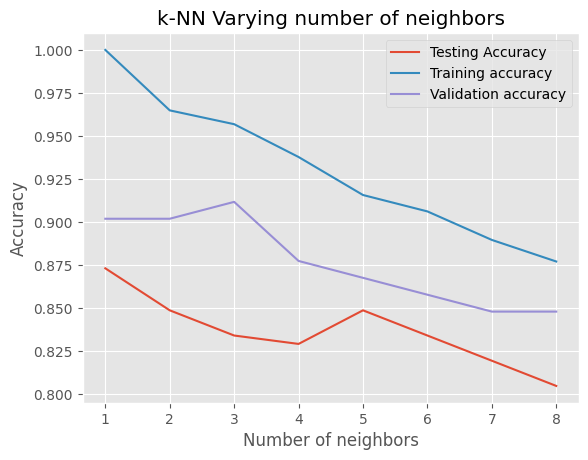

In [199]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(KNN_line, test_accuracy, label='Testing Accuracy')
plt.plot(KNN_line, train_accuracy, label='Training accuracy')
plt.plot(KNN_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
#KNeighbour(neighbours=3) 0.90 val 0.84 test

In [200]:
temp = KNeighborsClassifier(n_neighbors=3)
temp.fit(X_train, y_train)
accuracy_validation = temp.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", accuracy_validation)
accuracy = temp.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", accuracy)

Genauigkeit auf Validierungsdaten: 0.9117647058823529
Genauigkeit auf Testdaten: 0.8341463414634146


# SVC

In [201]:
svc_parameter = {
    'C': [50,56,57,58,59,60,61,62,70,100,125,130, 135], #range von 40 - 110
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [1,2,3],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}
svc_model = SVC()

In [202]:
# GridSearchCV
grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_parameter, cv=15)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_svc_model = grid_search.best_estimator_
grid_best_svc_model.fit(X_train, y_train)

Beste Hyperparameter: {'C': 130, 'class_weight': None, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=130, degree=1)

In [203]:
grid_svc_accuracy_validation = grid_best_svc_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_svc_accuracy_validation)
grid_svc_accuracy = grid_best_svc_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_svc_accuracy)

Genauigkeit auf Validierungsdaten: 0.9656862745098039


Genauigkeit auf Testdaten: 0.9073170731707317


In [204]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svc_model, param_distributions=svc_parameter, n_iter=10, cv=20, random_state=43)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_svc_model = random_search.best_estimator_
random_best_svc_model.fit(X_train, y_train)

Beste Hyperparameter: {'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'class_weight': None, 'C': 56}


SVC(C=56, kernel='poly')

In [205]:
random_svc_accuracy_validation = random_best_svc_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_svc_accuracy_validation)
random_svc_accuracy = random_best_svc_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_svc_accuracy)

Genauigkeit auf Validierungsdaten: 0.9607843137254902
Genauigkeit auf Testdaten: 0.9121951219512195


In [206]:
SVC_line = np.arange(70,160)#0.93717277486911
train_accuracy =np.empty(len(SVC_line))
test_accuracy = np.empty(len(SVC_line))
validation_accuracy = np.empty(len(SVC_line))
k=70
for i,k in enumerate(SVC_line):
    #Setup a knn classifier with k neighbors
    svc_c = SVC(kernel='poly', C=k, probability=True, class_weight='balanced', degree=3, gamma='scale')
    
    #Fit the model
    svc_c.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = svc_c.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = svc_c.score(X_test, y_test)

    #Compute accuracy on the validation set
    validation_accuracy[i] = svc_c.score(X_validation, y_validation)

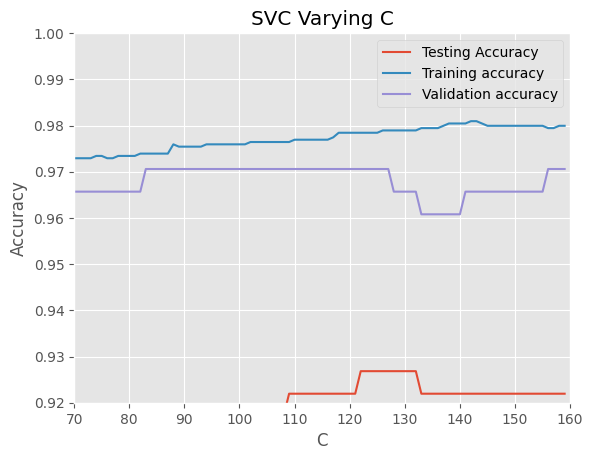

In [207]:
#Generate plot
plt.title('SVC Varying C')
plt.plot(SVC_line, test_accuracy, label='Testing Accuracy')
plt.plot(SVC_line, train_accuracy, label='Training accuracy')
plt.plot(SVC_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim(0.92, 1)
plt.xlim(70,160)
plt.show()

In [208]:
temp = SVC(kernel='poly', C=126, probability=True, class_weight='balanced', degree=3, gamma='scale')
temp.fit(X_train, y_train)
accuracy_validation = temp.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", accuracy_validation)
accuracy = temp.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", accuracy)

Genauigkeit auf Validierungsdaten: 0.9705882352941176
Genauigkeit auf Testdaten: 0.926829268292683


# NuSVC

In [210]:
nusvc_parameter = {
    'nu': np.arange(0, 0.2, 0.01),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}
nusvc_model = NuSVC()

In [211]:
grid_search = GridSearchCV(estimator=nusvc_model, param_grid=nusvc_parameter, cv=15)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_nusvc_model = grid_search.best_estimator_
grid_best_nusvc_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
600 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ba

Beste Hyperparameter: {'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'nu': 0.15}


NuSVC(degree=2, kernel='poly', nu=0.15)

In [212]:
grid_nusvc_accuracy_validation = grid_best_nusvc_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_nusvc_accuracy_validation)
grid_nusvc_accuracy = grid_best_nusvc_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_nusvc_accuracy)

Genauigkeit auf Validierungsdaten: 0.9509803921568627
Genauigkeit auf Testdaten: 0.8878048780487805


In [379]:
random_search = RandomizedSearchCV(estimator=nusvc_model, param_distributions=nusvc_parameter, n_iter=10, cv=20, random_state=44)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_nusvc_model = random_search.best_estimator_
random_best_nusvc_model.fit(X_train, y_train)

Beste Hyperparameter: {'nu': 0.1, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 1}


NuSVC(degree=1, nu=0.1)

In [380]:
random_nusvc_accuracy_validation = random_best_nusvc_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_nusvc_accuracy_validation)
random_nusvc_accuracy = random_best_nusvc_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_nusvc_accuracy)

Genauigkeit auf Validierungsdaten: 0.9705882352941176
Genauigkeit auf Testdaten: 0.9121951219512195


In [215]:
NuSVC_line = np.arange(0, 0.2, 0.01)
train_accuracy = np.empty(len(NuSVC_line))
test_accuracy = np.empty(len(NuSVC_line))
validation_accuracy = np.empty(len(NuSVC_line))
k = 0.1

for i, nu_value in enumerate(NuSVC_line):
    # Setup a knn classifier with k neighbors
    nusvc_c = NuSVC(kernel='linear', nu=nu_value + 0.01, degree=4, gamma='auto')

    # Fit the model
    nusvc_c.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = nusvc_c.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = nusvc_c.score(X_test, y_test)

    # Compute accuracy on the validation set
    validation_accuracy[i] = nusvc_c.score(X_validation, y_validation)


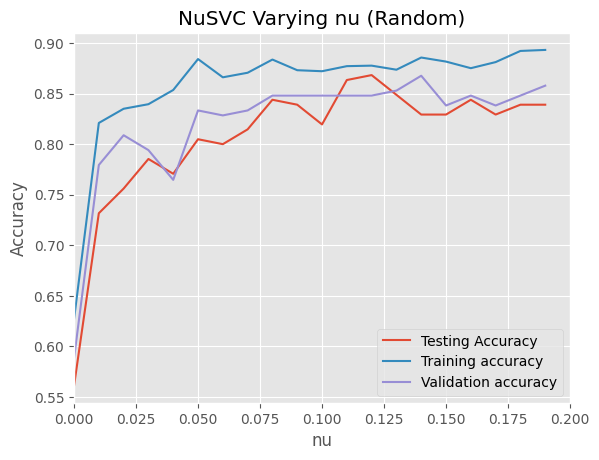

In [216]:
#Generate plot
plt.title('NuSVC Varying nu (Random)')
plt.plot(NuSVC_line, test_accuracy, label='Testing Accuracy')
plt.plot(NuSVC_line, train_accuracy, label='Training accuracy')
plt.plot(NuSVC_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('nu')
plt.ylabel('Accuracy')
plt.xlim(0,0.2)
plt.show()

In [217]:
NuSVC_line = np.arange(0, 0.2, 0.01)
train_accuracy = np.empty(len(NuSVC_line))
test_accuracy = np.empty(len(NuSVC_line))
validation_accuracy = np.empty(len(NuSVC_line))
k = 0.1

for i, nu_value in enumerate(NuSVC_line):
    # Setup a knn classifier with k neighbors
    nusvc_c = NuSVC(kernel='poly', nu=nu_value + 0.01, probability=True, degree=3, gamma='scale')

    # Fit the model
    nusvc_c.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = nusvc_c.score(X_train, y_train)

    # Compute accuracy on the test set
    test_accuracy[i] = nusvc_c.score(X_test, y_test)

    # Compute accuracy on the validation set
    validation_accuracy[i] = nusvc_c.score(X_validation, y_validation)


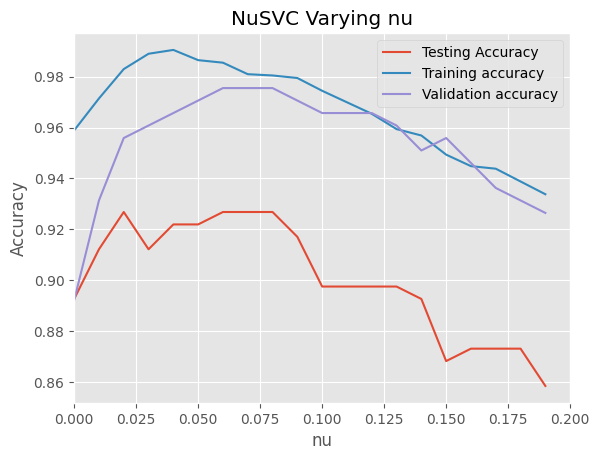

In [218]:
#Generate plot
plt.title('NuSVC Varying nu')
plt.plot(NuSVC_line, test_accuracy, label='Testing Accuracy')
plt.plot(NuSVC_line, train_accuracy, label='Training accuracy')
plt.plot(NuSVC_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('nu')
plt.ylabel('Accuracy')
plt.xlim(0,0.2)
plt.show()

In [396]:

nusvc_best= NuSVC(degree=3, gamma='scale', kernel='poly', nu=0.066)
nusvc_best.fit(X_train, y_train)
accuracy_validation = nusvc_best.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", accuracy_validation)
accuracy = nusvc_best.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", accuracy)

Genauigkeit auf Validierungsdaten: 0.9803921568627451
Genauigkeit auf Testdaten: 0.926829268292683


# DecisionTreeClassifier

In [220]:
dt_parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,None],
    'min_samples_split': [5, 8, 9, 10],
    'min_samples_leaf': [3, 4, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
}
dt_model = DecisionTreeClassifier()

In [221]:
# GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_parameter, cv=20)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_dt_model = grid_search.best_estimator_
grid_best_dt_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
23040 fits failed out of a total of 92160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23040 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklear

Beste Hyperparameter: {'criterion': 'log_loss', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'random'}


c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.37090909 0.44363636 0.35590909]
  warnings.warn(


DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=4,
                       min_samples_split=8, splitter='random')

In [222]:
grid_dt_accuracy_validation = grid_best_dt_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_dt_accuracy_validation)
grid_dt_accuracy = grid_best_dt_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_dt_accuracy)

Genauigkeit auf Validierungsdaten: 0.6127450980392157
Genauigkeit auf Testdaten: 0.6731707317073171


In [223]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=dt_parameter, n_iter=10, cv=20, random_state=44)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_dt_model = random_search.best_estimator_
random_best_dt_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

Beste Hyperparameter: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy'}


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5)

In [224]:
random_dt_accuracy_validation = random_best_dt_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_dt_accuracy_validation)
random_dt_accuracy = random_best_dt_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_dt_accuracy)

Genauigkeit auf Validierungsdaten: 0.5294117647058824
Genauigkeit auf Testdaten: 0.5756097560975609


In [225]:
#Generate plot


# RandomForestClassifier

In [226]:
rf_parameter = {
    'n_estimators': [ 100, 110, 120,130, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'min_samples_split': [5, 6, 7, 9, 10, 11, 15],
    'min_samples_leaf': [1, 2, 3, 4],
}
rf_model = RandomForestClassifier()

In [227]:
# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_parameter, cv=5)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_rf_model = grid_search.best_estimator_
grid_best_rf_model.fit(X_train, y_train)

Beste Hyperparameter: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(min_samples_split=5)

In [228]:
grid_rf_accuracy_validation = grid_best_rf_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_rf_accuracy_validation)
grid_rf_accuracy = grid_best_rf_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_rf_accuracy)

Genauigkeit auf Validierungsdaten: 0.8627450980392157
Genauigkeit auf Testdaten: 0.8731707317073171


In [229]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_parameter, n_iter=10, cv=20, random_state=43)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_rf_model = random_search.best_estimator_
random_best_rf_model.fit(X_train, y_train)

Beste Hyperparameter: {'n_estimators': 110, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=110)

In [230]:
random_rf_accuracy_validation = random_best_rf_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_rf_accuracy_validation)
random_rf_accuracy = random_best_rf_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_rf_accuracy)

Genauigkeit auf Validierungsdaten: 0.8578431372549019
Genauigkeit auf Testdaten: 0.8780487804878049


In [231]:
RandomForest_line = np.arange(90,200)
train_accuracy =np.empty(len(RandomForest_line))
test_accuracy = np.empty(len(RandomForest_line))
validation_accuracy = np.empty(len(RandomForest_line))
k=90
for i,k in enumerate(RandomForest_line):
    #Setup a knn classifier with k neighbors
    rf_c = RandomForestClassifier(n_estimators=k, criterion='log_loss', max_depth=None, min_samples_split=6, min_samples_leaf=2)
    
    #Fit the model
    rf_c.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = rf_c.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = rf_c.score(X_test, y_test)

    #Compute accuracy on the validation set
    validation_accuracy[i] = rf_c.score(X_validation, y_validation)
    

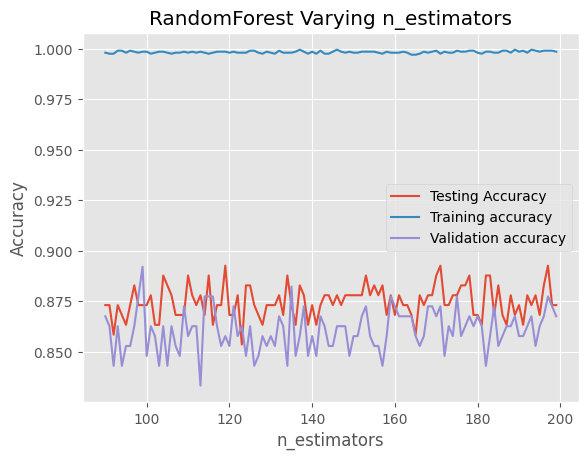

In [232]:
#Generate plot
plt.title('RandomForest Varying n_estimators')
plt.plot(RandomForest_line, test_accuracy, label='Testing Accuracy')
plt.plot(RandomForest_line, train_accuracy, label='Training accuracy')
plt.plot(RandomForest_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# AdaBoostClassifier

In [233]:
ab_parameter = {
    'estimator': [None],
    'n_estimators': [100, 150, 200, 250, 300, 400, 500],
    'learning_rate': [0.09, 0.1, 0.11],
    'algorithm': ['SAMME.R'],
    'random_state': [None]
}
adaboost_model = AdaBoostClassifier()

In [234]:
# GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=ab_parameter, cv=20)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_ab_model = grid_search.best_estimator_
grid_best_ab_model.fit(X_test, y_test)

Beste Hyperparameter: {'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 0.1, 'n_estimators': 150, 'random_state': None}


AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [235]:
grid_ab_accuracy_validation = grid_best_ab_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_ab_accuracy_validation)
grid_ab_accuracy = grid_best_ab_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_ab_accuracy)

Genauigkeit auf Validierungsdaten: 0.28431372549019607
Genauigkeit auf Testdaten: 0.526829268292683


In [236]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=adaboost_model, param_distributions=ab_parameter, n_iter=10, cv=20, random_state=42)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_ab_model = random_search.best_estimator_
random_best_ab_model.fit(X_train, y_train)

Beste Hyperparameter: {'random_state': None, 'n_estimators': 150, 'learning_rate': 0.1, 'estimator': None, 'algorithm': 'SAMME.R'}


AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [237]:
random_ab_accuracy_validation = random_best_ab_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_ab_accuracy_validation)
random_ab_accuracy = random_best_ab_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_ab_accuracy)

Genauigkeit auf Validierungsdaten: 0.5
Genauigkeit auf Testdaten: 0.5024390243902439


In [238]:
AdaBoost_line = np.arange(210,260)
train_accuracy =np.empty(len(AdaBoost_line))
test_accuracy = np.empty(len(AdaBoost_line))
validation_accuracy = np.empty(len(AdaBoost_line))
k=210
for i,k in enumerate(AdaBoost_line):
    #Setup a knn classifier with k neighbors
    ada_c = AdaBoostClassifier(n_estimators=k, learning_rate=0.1, algorithm='SAMME.R', random_state=None)
    
    #Fit the model
    ada_c.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = ada_c.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = ada_c.score(X_test, y_test)

    #Compute accuracy on the validation set
    validation_accuracy[i] = ada_c.score(X_validation, y_validation)

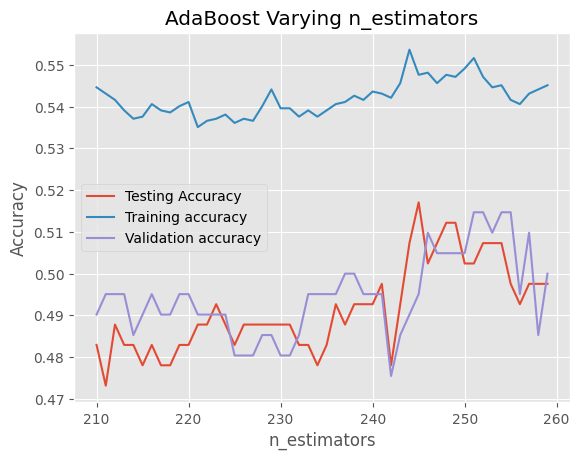

In [239]:
#Generate plot
plt.title('AdaBoost Varying n_estimators')
plt.plot(AdaBoost_line, test_accuracy, label='Testing Accuracy')
plt.plot(AdaBoost_line, train_accuracy, label='Training accuracy')
plt.plot(AdaBoost_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

# GradientBoostClassifier

In [240]:
gb_parameter = {
    'loss': ['log_loss'],
    'n_estimators': [50, 100, 200, 250,  300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_samples_split': [1, 2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}
gb_model = GradientBoostingClassifier()

In [241]:
# GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_parameter, cv=2)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_gb_model = grid_search.best_estimator_
grid_best_gb_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

Beste Hyperparameter: {'learning_rate': 0.3, 'loss': 'log_loss', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


GradientBoostingClassifier(learning_rate=0.3, n_estimators=300)

In [242]:
grid_gb_accuracy_validation = grid_best_gb_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_gb_accuracy_validation)
grid_gb_accuracy = grid_best_gb_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_gb_accuracy)

Genauigkeit auf Validierungsdaten: 0.9068627450980392
Genauigkeit auf Testdaten: 0.8975609756097561


In [243]:
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_parameter, n_iter=10, cv=5, random_state=42)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_gb_model = random_search.best_estimator_
random_best_gb_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

Beste Hyperparameter: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'loss': 'log_loss', 'learning_rate': 0.1}


GradientBoostingClassifier(min_samples_leaf=3, n_estimators=300)

In [244]:
random_gb_accuracy_validation = random_best_gb_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_gb_accuracy_validation)
random_gb_accuracy = random_best_gb_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_gb_accuracy)

Genauigkeit auf Validierungsdaten: 0.9019607843137255
Genauigkeit auf Testdaten: 0.8926829268292683


GradientBoostClassifier #Generate Plot

# LogisticRegression

In [245]:
lr_parameter = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [400, 500, 600]
}
lr_model = LogisticRegression()

In [246]:
# GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_parameter, cv=2)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_lr_model = grid_search.best_estimator_
grid_best_lr_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\s

Beste Hyperparameter: {'C': 3792.690190732246, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=3792.690190732246, max_iter=500, penalty='l1',
                   solver='liblinear')

In [247]:
grid_lr_accuracy_validation = grid_best_lr_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_lr_accuracy_validation)
grid_lr_accuracy = grid_best_lr_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_lr_accuracy)

Genauigkeit auf Validierungsdaten: 0.9068627450980392
Genauigkeit auf Testdaten: 0.8341463414634146


In [248]:
random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_parameter, n_iter=60, cv=20, random_state=44)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_lr_model = random_search.best_estimator_
random_best_lr_model.fit(X_train, y_train)

c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

Beste Hyperparameter: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 3792.690190732246}


LogisticRegression(C=3792.690190732246, max_iter=500, penalty='l1',
                   solver='liblinear')

In [249]:
random_lr_accuracy_validation = random_best_lr_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_lr_accuracy_validation)
random_lr_accuracy = random_best_lr_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_lr_accuracy)

Genauigkeit auf Validierungsdaten: 0.9068627450980392
Genauigkeit auf Testdaten: 0.8439024390243902


In [250]:
LogisticRegression_line = np.arange(470,530)
train_accuracy =np.empty(len(LogisticRegression_line))
test_accuracy = np.empty(len(LogisticRegression_line))
validation_accuracy = np.empty(len(LogisticRegression_line))
k=470
for i,k in enumerate(LogisticRegression_line):
    #Setup a knn classifier with k neighbors
    lr_c = LogisticRegression(penalty = 'l1', C=3792.690190732246, solver = 'liblinear', max_iter = k)

    #Fit the model
    lr_c.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = lr_c.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = lr_c.score(X_test, y_test)

    #Compute accuracy on the validation set
    validation_accuracy[i] = lr_c.score(X_validation, y_validation)

KeyboardInterrupt: 

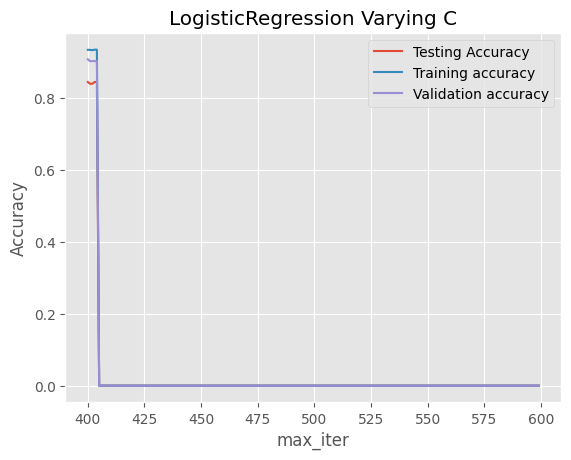

In [251]:
#Generate Plot
plt.title('LogisticRegression Varying C')
plt.plot(LogisticRegression_line, test_accuracy, label='Testing Accuracy')
plt.plot(LogisticRegression_line, train_accuracy, label='Training accuracy')
plt.plot(LogisticRegression_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.show()

# Pipeline

In [252]:
pipeline_classifier = grid_best_knn_model, grid_best_svc_model, grid_best_nusvc_model, grid_best_dt_model, grid_best_rf_model, grid_best_ab_model, grid_best_gb_model, grid_best_lr_model, random_best_knn_model, random_best_svc_model, random_best_nusvc_model, random_best_dt_model, random_best_rf_model, random_best_ab_model, random_best_gb_model, random_best_lr_model

In [253]:
pl_parameter = {
    'scaler': [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),RobustScaler()],
    'classifier': [grid_best_knn_model, grid_best_svc_model, grid_best_nusvc_model, grid_best_dt_model, grid_best_rf_model,grid_best_ab_model, grid_best_gb_model, grid_best_lr_model, random_best_knn_model, random_best_svc_model, random_best_nusvc_model, random_best_dt_model, random_best_rf_model,random_best_ab_model, random_best_gb_model, random_best_lr_model]}
pl_model = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', grid_best_knn_model)])

In [255]:
# GridSearchCV
grid_search = GridSearchCV(estimator=pl_model, param_grid=pl_parameter, cv=3)
grid_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", grid_search.best_params_)
grid_best_pl_model = grid_search.best_estimator_
grid_best_pl_model.fit(X_train, y_train)

Beste Hyperparameter: {'classifier': LogisticRegression(C=3792.690190732246, max_iter=500, penalty='l1',
                   solver='liblinear'), 'scaler': MaxAbsScaler()}


Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(C=3792.690190732246, max_iter=500,
                                    penalty='l1', solver='liblinear'))])

In [257]:
grid_pl_accuracy_validation = grid_best_pl_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", grid_pl_accuracy_validation)
grid_pl_accuracy = grid_best_pl_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", grid_pl_accuracy)

Genauigkeit auf Validierungsdaten: 0.9313725490196079
Genauigkeit auf Testdaten: 0.8536585365853658


In [259]:
random_search = RandomizedSearchCV(estimator=pl_model, param_distributions=pl_parameter, n_iter=10, cv=20, random_state=42)
random_search.fit(X_validation, y_validation)
print("Beste Hyperparameter:", random_search.best_params_)
random_best_pl_model = random_search.best_estimator_
random_best_pl_model.fit(X_train, y_train)

Beste Hyperparameter: {'scaler': MinMaxScaler(), 'classifier': LogisticRegression(C=3792.690190732246, max_iter=500, penalty='l1',
                   solver='liblinear')}


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(C=3792.690190732246, max_iter=500,
                                    penalty='l1', solver='liblinear'))])

In [260]:
random_pl_accuracy_validation = random_best_pl_model.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", random_pl_accuracy_validation)
random_pl_accuracy = random_best_pl_model.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", random_pl_accuracy)

Genauigkeit auf Validierungsdaten: 0.8970588235294118
Genauigkeit auf Testdaten: 0.8682926829268293


In [261]:
scaler = StandardScaler(),MinMaxScaler(),MaxAbsScaler(),RobustScaler()

In [262]:
Pipeline_line = np.arange(len(pipeline_classifier))
train_accuracy =np.empty(len(Pipeline_line))
test_accuracy = np.empty(len(Pipeline_line))
validation_accuracy = np.empty(len(Pipeline_line))
k=0
for i,k in enumerate(Pipeline_line):
    #Setup a knn classifier with k neighbors
    pl_c = Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', pipeline_classifier[k])])
    
    #Fit the model
    pl_c.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = pl_c.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = pl_c.score(X_test, y_test)

    #Compute accuracy on the validation set
    validation_accuracy[i] = pl_c.score(X_validation, y_validation)

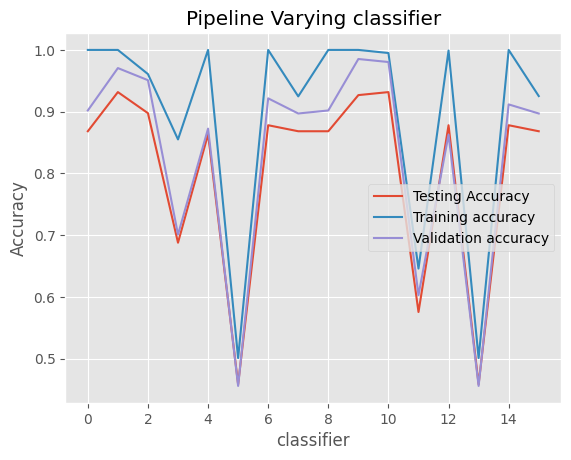

In [263]:
#Generate plot
plt.title('Pipeline Varying classifier')
plt.plot(Pipeline_line, test_accuracy, label='Testing Accuracy')
plt.plot(Pipeline_line, train_accuracy, label='Training accuracy')
plt.plot(Pipeline_line, validation_accuracy, label='Validation accuracy')
plt.legend()
plt.xlabel('classifier')
plt.ylabel('Accuracy')
plt.show()


# Ohne ParameterTuning

In [264]:
knn = KNeighborsClassifier()
svc = SVC()
nusvc = NuSVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()

In [265]:
#print the accuracy score and validation score of each model
print("KNN")
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", knn_accuracy)
knn_accuracy_validation = knn.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", knn_accuracy_validation)
print("SVC")
svc.fit(X_train, y_train)
svc_accuracy = svc.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", svc_accuracy)
svc_accuracy_validation = svc.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", svc_accuracy_validation)
print("NuSVC")
nusvc.fit(X_train, y_train)
nusvc_accuracy = nusvc.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", nusvc_accuracy)
nusvc_accuracy_validation = nusvc.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", nusvc_accuracy_validation)
print("DecisionTree")
dt.fit(X_train, y_train)
dt_accuracy = dt.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", dt_accuracy)
dt_accuracy_validation = dt.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", dt_accuracy_validation)
print("RandomForest")
rf.fit(X_train, y_train)
rf_accuracy = rf.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", rf_accuracy)
rf_accuracy_validation = rf.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", rf_accuracy_validation)
print("AdaBoost")
ab.fit(X_train, y_train)
ab_accuracy = ab.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", ab_accuracy)
ab_accuracy_validation = ab.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", ab_accuracy_validation)
print("GradientBoosting")
gb.fit(X_train, y_train)
gb_accuracy = gb.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", gb_accuracy)
gb_accuracy_validation = gb.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", gb_accuracy_validation)
print("LogisticRegression")
lr.fit(X_train, y_train)
lr_accuracy = lr.score(X_test, y_test)
print("Genauigkeit auf Testdaten:", lr_accuracy)
lr_accuracy_validation = lr.score(X_validation, y_validation)
print("Genauigkeit auf Validierungsdaten:", lr_accuracy_validation)

KNN
Genauigkeit auf Testdaten: 0.848780487804878
Genauigkeit auf Validierungsdaten: 0.8676470588235294
SVC
Genauigkeit auf Testdaten: 0.6585365853658537
Genauigkeit auf Validierungsdaten: 0.6715686274509803
NuSVC
Genauigkeit auf Testdaten: 0.7902439024390244
Genauigkeit auf Validierungsdaten: 0.8186274509803921
DecisionTree
Genauigkeit auf Testdaten: 0.8
Genauigkeit auf Validierungsdaten: 0.7647058823529411
RandomForest
Genauigkeit auf Testdaten: 0.8780487804878049
Genauigkeit auf Validierungsdaten: 0.8921568627450981
AdaBoost
Genauigkeit auf Testdaten: 0.375609756097561
Genauigkeit auf Validierungsdaten: 0.31862745098039214
GradientBoosting
Genauigkeit auf Testdaten: 0.8634146341463415
Genauigkeit auf Validierungsdaten: 0.8382352941176471
LogisticRegression
Genauigkeit auf Testdaten: 0.6341463414634146
Genauigkeit auf Validierungsdaten: 0.6568627450980392


c:\Users\leoko\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# All Scores

In [266]:
Names = [
    "KNeighborsClassifier",
    "SVC",
    "NuSVC",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "GradientBoostingClassifier",
    "LogisticRegression",
    "Pipeline"
]

In [267]:
class DbTable:
    def __init__(self, name, columns):
        self.name = name
        self.columns = columns
        self.data = []

    def insert(self, *args):
        row = dict(zip(self.columns, args))
        self.data.append(row)

    def printTable(self):
        print(self.name)
        for row in self.data:
            print(row)

In [268]:
grid_score = DbTable('grid_scores', ['name','Validation','Test'])
grid_score.insert(Names[0],grid_knn_accuracy_validation,grid_knn_accuracy)
grid_score.insert(Names[1],grid_svc_accuracy_validation,grid_svc_accuracy)
grid_score.insert(Names[2],grid_nusvc_accuracy_validation,grid_nusvc_accuracy)
grid_score.insert(Names[3],grid_dt_accuracy_validation,grid_dt_accuracy)
grid_score.insert(Names[4],grid_rf_accuracy_validation,grid_rf_accuracy)
grid_score.insert(Names[5],grid_ab_accuracy_validation,grid_ab_accuracy)
grid_score.insert(Names[6],grid_gb_accuracy_validation,grid_gb_accuracy)
grid_score.insert(Names[7],grid_lr_accuracy_validation,grid_lr_accuracy)
grid_score.insert(Names[8],grid_pl_accuracy_validation,grid_pl_accuracy)
grid_score.printTable()

grid_scores
{'name': 'KNeighborsClassifier', 'Validation': 0.9019607843137255, 'Test': 0.8731707317073171}
{'name': 'SVC', 'Validation': 0.9656862745098039, 'Test': 0.9073170731707317}
{'name': 'NuSVC', 'Validation': 0.9509803921568627, 'Test': 0.8878048780487805}
{'name': 'DecisionTreeClassifier', 'Validation': 0.6127450980392157, 'Test': 0.6731707317073171}
{'name': 'RandomForestClassifier', 'Validation': 0.8627450980392157, 'Test': 0.8731707317073171}
{'name': 'AdaBoostClassifier', 'Validation': 0.28431372549019607, 'Test': 0.526829268292683}
{'name': 'GradientBoostingClassifier', 'Validation': 0.9068627450980392, 'Test': 0.8975609756097561}
{'name': 'LogisticRegression', 'Validation': 0.9068627450980392, 'Test': 0.8341463414634146}
{'name': 'Pipeline', 'Validation': 0.9313725490196079, 'Test': 0.8536585365853658}


In [269]:
random_score = DbTable('random_scores',['name','Validation','Test'])
random_score.insert(Names[0],random_knn_accuracy_validation,random_knn_accuracy)
random_score.insert(Names[1],random_svc_accuracy_validation,random_svc_accuracy)
random_score.insert(Names[2],random_nusvc_accuracy_validation,random_nusvc_accuracy)
random_score.insert(Names[3],random_dt_accuracy_validation,random_dt_accuracy)
random_score.insert(Names[4],random_rf_accuracy_validation,random_rf_accuracy)
random_score.insert(Names[5],random_ab_accuracy_validation,random_ab_accuracy)
random_score.insert(Names[6],random_gb_accuracy_validation,random_gb_accuracy)
random_score.insert(Names[7],random_lr_accuracy_validation,random_lr_accuracy)
random_score.insert(Names[8],random_pl_accuracy_validation,random_pl_accuracy)
random_score.printTable()

random_scores
{'name': 'KNeighborsClassifier', 'Validation': 0.9019607843137255, 'Test': 0.8731707317073171}
{'name': 'SVC', 'Validation': 0.9607843137254902, 'Test': 0.9121951219512195}
{'name': 'NuSVC', 'Validation': 0.9705882352941176, 'Test': 0.9121951219512195}
{'name': 'DecisionTreeClassifier', 'Validation': 0.5294117647058824, 'Test': 0.5756097560975609}
{'name': 'RandomForestClassifier', 'Validation': 0.8578431372549019, 'Test': 0.8780487804878049}
{'name': 'AdaBoostClassifier', 'Validation': 0.5, 'Test': 0.5024390243902439}
{'name': 'GradientBoostingClassifier', 'Validation': 0.9019607843137255, 'Test': 0.8926829268292683}
{'name': 'LogisticRegression', 'Validation': 0.9068627450980392, 'Test': 0.8439024390243902}
{'name': 'Pipeline', 'Validation': 0.8970588235294118, 'Test': 0.8682926829268293}


# Confusion Matrix

In [316]:
grid_best_knn_model.fit(X_train, y_train)
grid_best_svc_model.fit(X_train, y_train)
grid_best_nusvc_model.fit(X_train, y_train)
grid_best_dt_model.fit(X_train, y_train)
grid_best_rf_model.fit(X_train, y_train)
grid_best_ab_model.fit(X_train, y_train)
grid_best_gb_model.fit(X_train, y_train)
grid_best_lr_model.fit(X_train, y_train)
grid_best_pl_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('classifier',
                 LogisticRegression(C=3792.690190732246, max_iter=500,
                                    penalty='l1', solver='liblinear'))])

In [337]:
random_best_knn_model.fit(X_train, y_train)
random_best_svc_model.fit(X_train, y_train)
random_best_nusvc_model.fit(X_train, y_train)
random_best_dt_model.fit(X_train, y_train)
random_best_rf_model.fit(X_train, y_train)
random_best_ab_model.fit(X_train, y_train)
random_best_gb_model.fit(X_train, y_train)
random_best_lr_model.fit(X_train, y_train)
random_best_pl_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 LogisticRegression(C=3792.690190732246, max_iter=500,
                                    penalty='l1', solver='liblinear'))])

In [338]:
y_pred_grid = [
    grid_best_knn_model.predict(X_test),
    grid_best_svc_model.predict(X_test),
    grid_best_nusvc_model.predict(X_test),
    grid_best_dt_model.predict(X_test),
    grid_best_rf_model.predict(X_test),
    grid_best_ab_model.predict(X_test),
    grid_best_gb_model.predict(X_test),
    grid_best_lr_model.predict(X_test),
    grid_best_pl_model.predict(X_test)
]

In [339]:
y_pred_random = [
    random_best_knn_model.predict(X_test),
    random_best_svc_model.predict(X_test),
    random_best_nusvc_model.predict(X_test),
    random_best_dt_model.predict(X_test),
    random_best_rf_model.predict(X_test),
    random_best_ab_model.predict(X_test),
    random_best_gb_model.predict(X_test),
    random_best_lr_model.predict(X_test),
    random_best_pl_model.predict(X_test)
]

In [340]:
class_names = ["zero", "one", "two", "three", "four", "five", "spock", "other"]

SVC 0.375609756097561


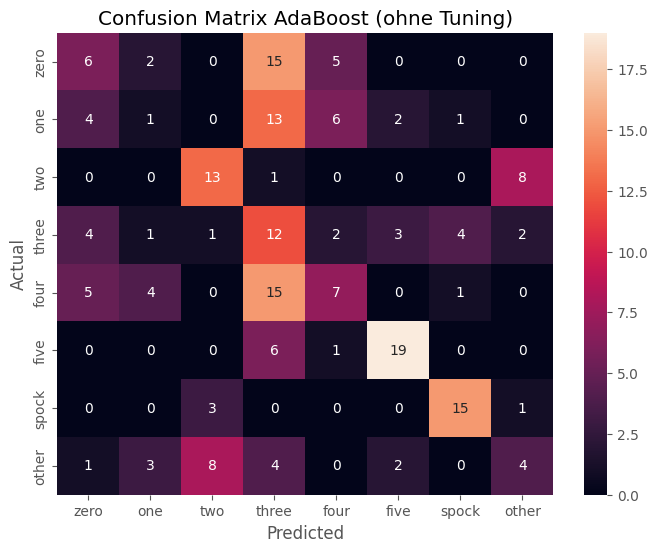

In [388]:
#Generate plot
temp = AdaBoostClassifier()
temp.fit(X_train, y_train)
print("SVC", temp.score(X_test, y_test))
temp = temp.predict(X_test)
conf_matrix = confusion_matrix(y_test, temp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix AdaBoost (ohne Tuning)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


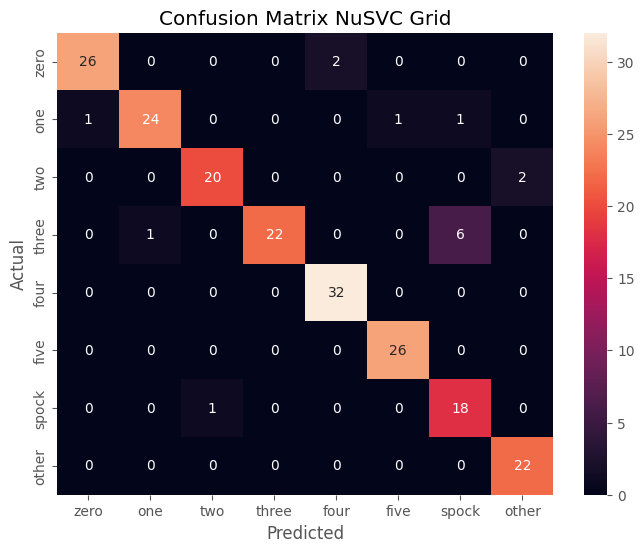

In [382]:
tmp = nusvc_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, tmp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix NuSVC Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

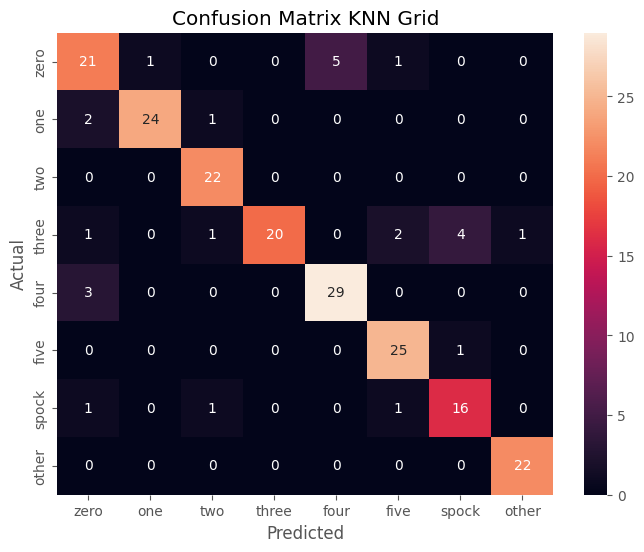

In [341]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[0])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix KNN Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

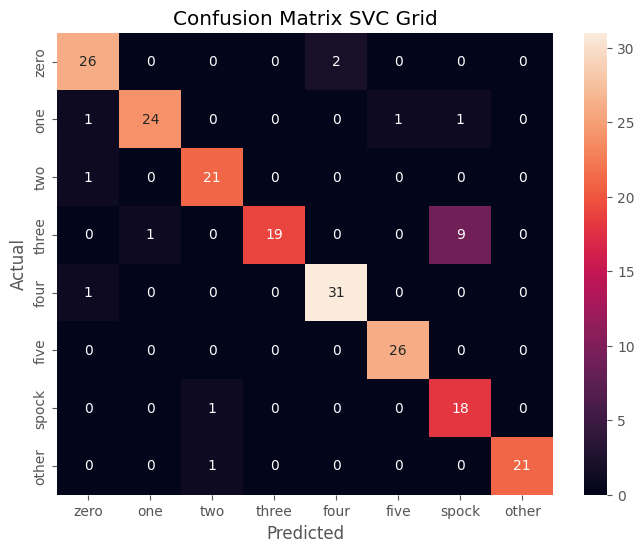

In [342]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix SVC Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

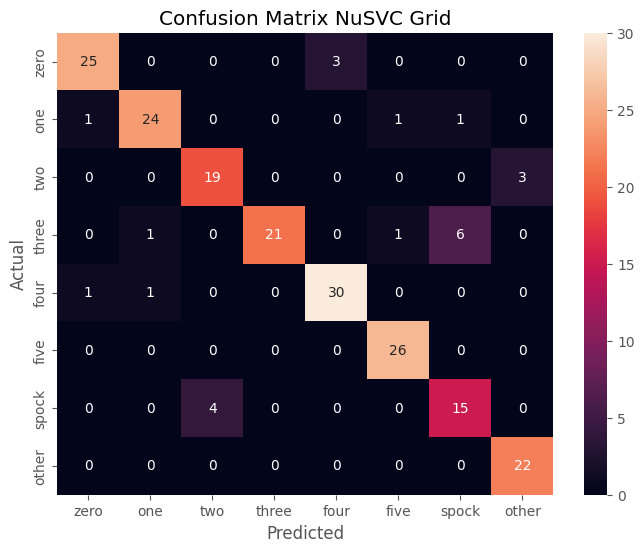

In [343]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[2])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix NuSVC Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

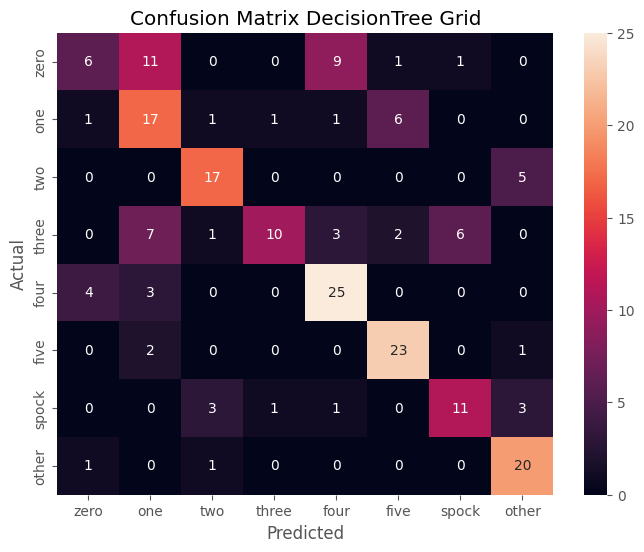

In [344]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[3])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix DecisionTree Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

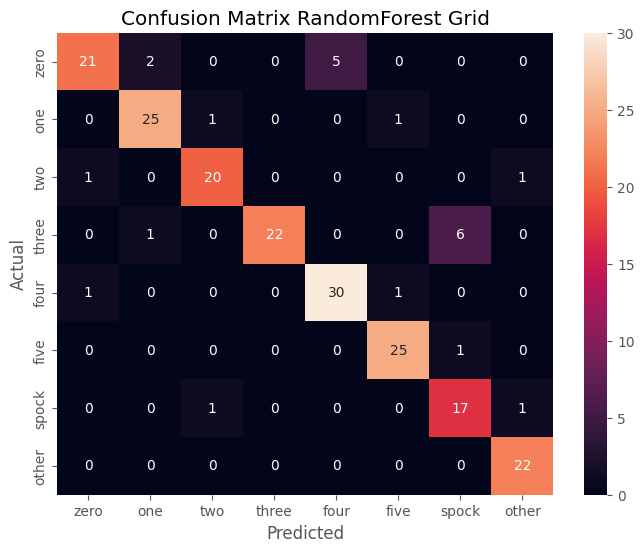

In [345]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[4])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix RandomForest Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

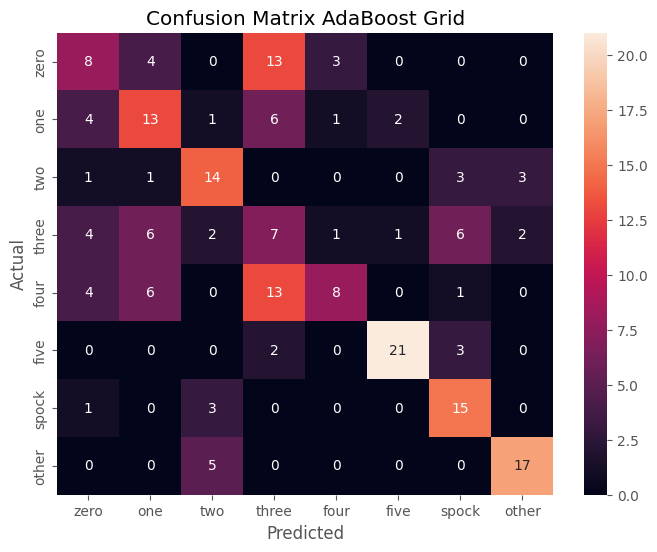

In [346]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[5])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix AdaBoost Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

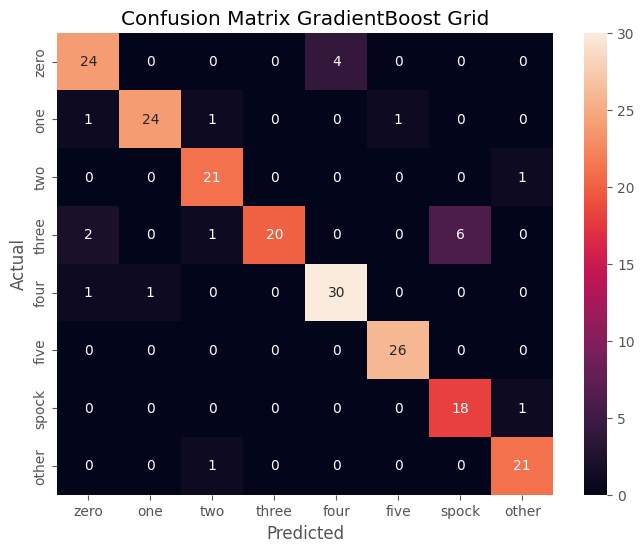

In [347]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[6])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix GradientBoost Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

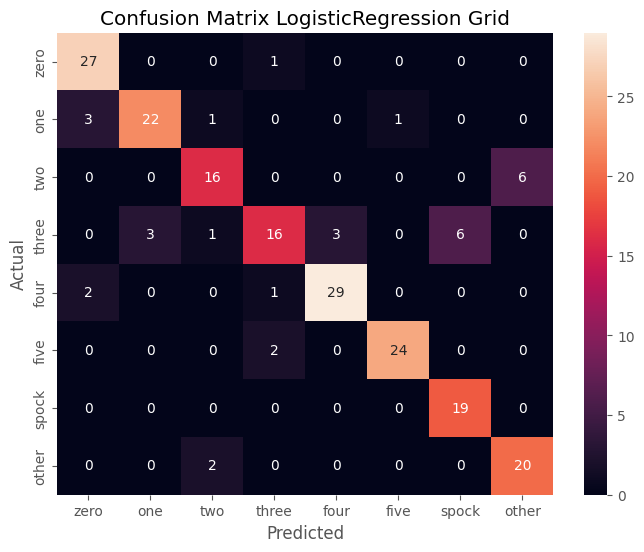

In [348]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[7])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix LogisticRegression Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

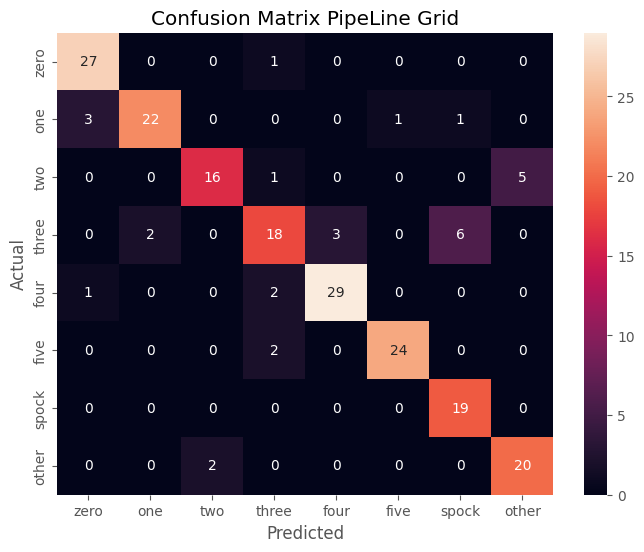

In [349]:
conf_matrix = confusion_matrix(y_test, y_pred_grid[8])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix PipeLine Grid")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix RandomSearch

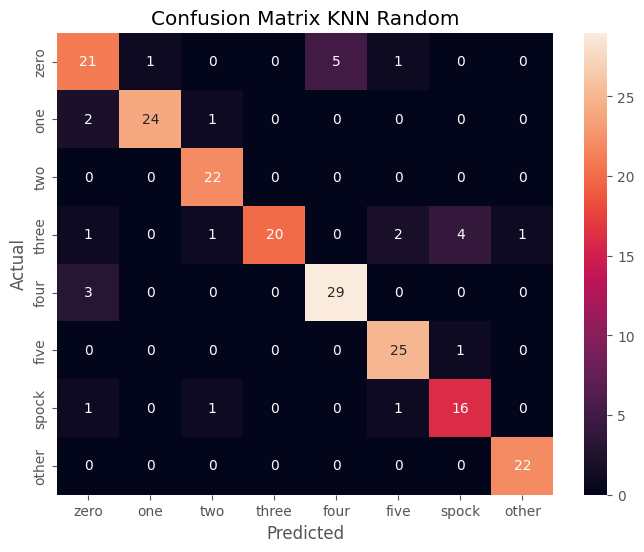

In [350]:
conf_matrix = confusion_matrix(y_test, y_pred_random[0])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix KNN Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

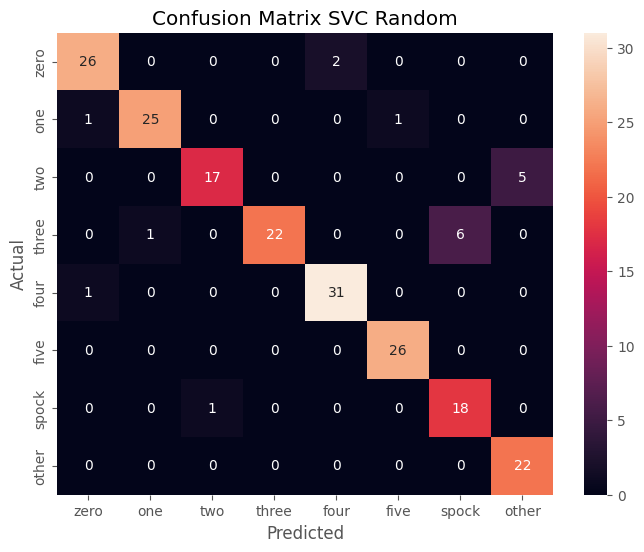

In [351]:
conf_matrix = confusion_matrix(y_test, y_pred_random[1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix SVC Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

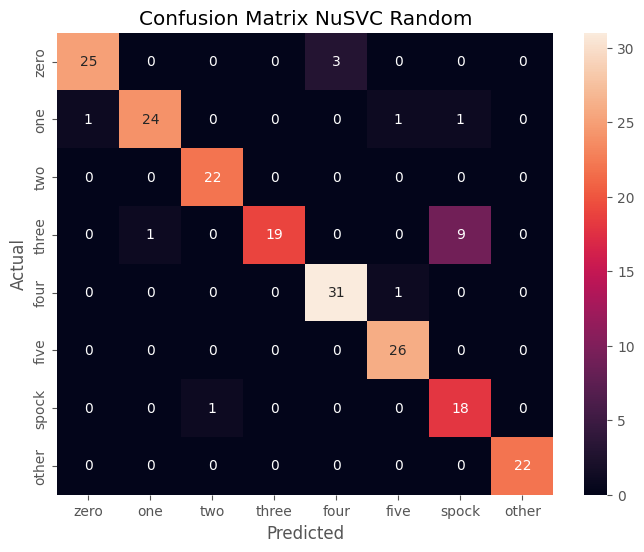

In [352]:
conf_matrix = confusion_matrix(y_test, y_pred_random[2])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix NuSVC Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

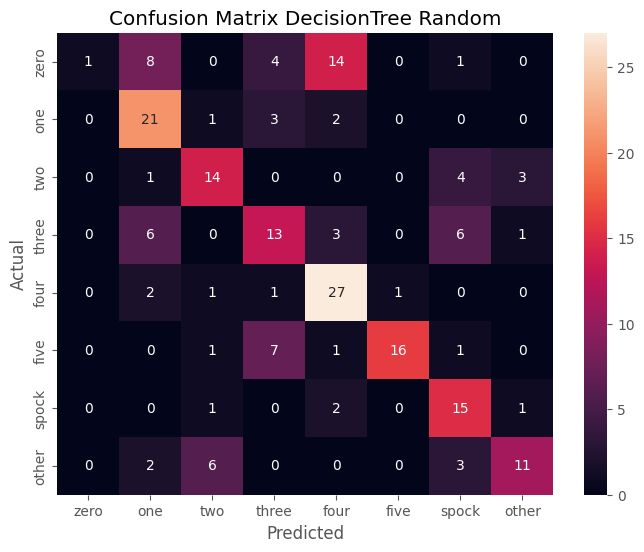

In [353]:
conf_matrix = confusion_matrix(y_test, y_pred_random[3])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix DecisionTree Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

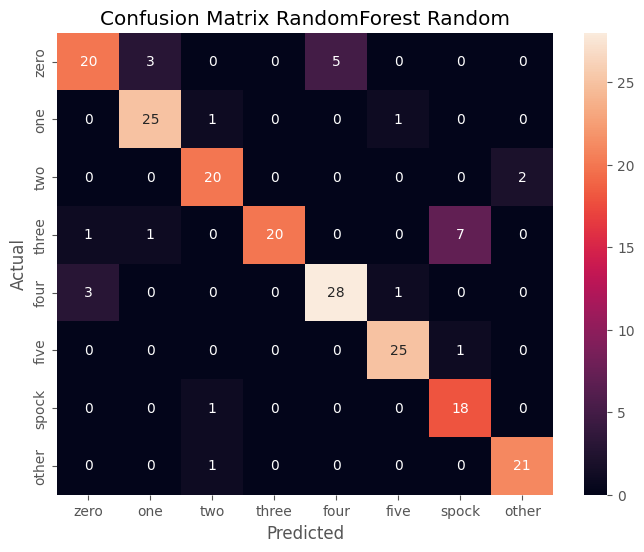

In [354]:
conf_matrix = confusion_matrix(y_test, y_pred_random[4])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix RandomForest Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

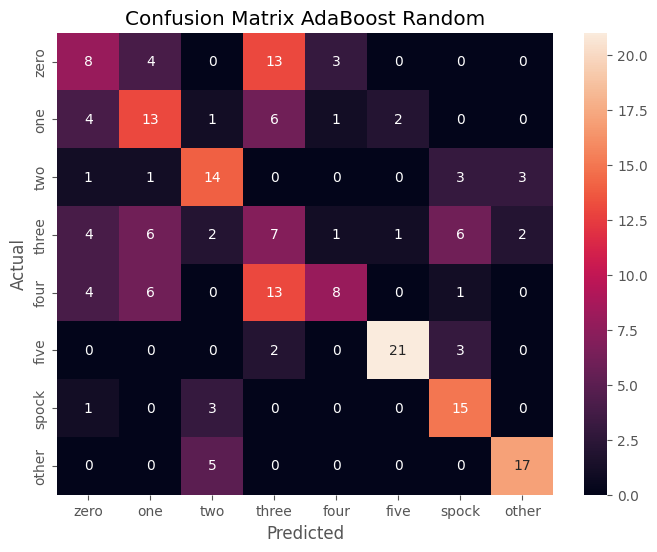

In [355]:
conf_matrix = confusion_matrix(y_test, y_pred_random[5])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix AdaBoost Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

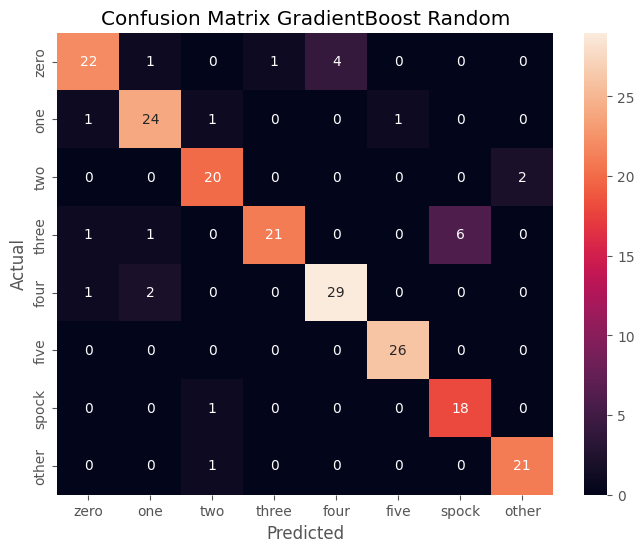

In [356]:
conf_matrix = confusion_matrix(y_test, y_pred_random[6])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix GradientBoost Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

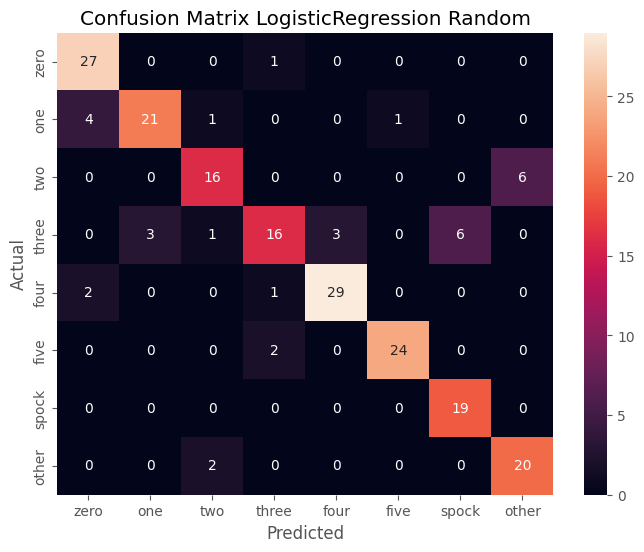

In [357]:
conf_matrix = confusion_matrix(y_test, y_pred_random[7])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix LogisticRegression Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

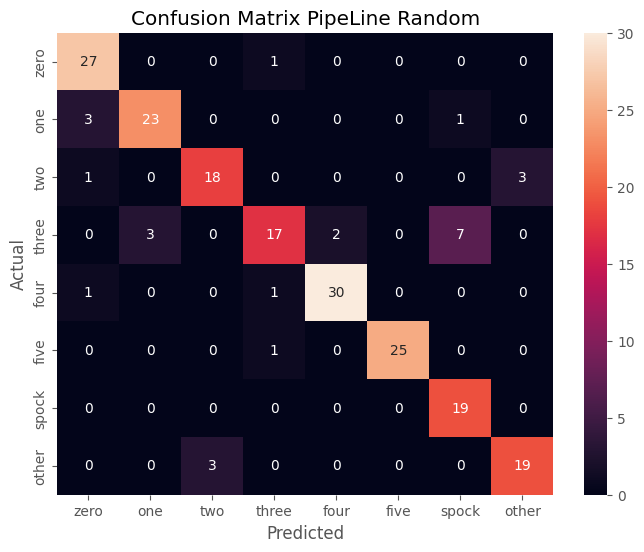

In [358]:
conf_matrix = confusion_matrix(y_test, y_pred_random[8])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d")
plt.title("Confusion Matrix PipeLine Random")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()